In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [19]:
df = pd.read_csv("ForecastSunspot.csv")


In [20]:

df.drop(columns='Date', inplace=True)

In [21]:
y=df['Monthly Mean Total Sunspot Number']
X=df.drop(['Monthly Mean Total Sunspot Number'], axis=1)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred = lr.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

c:\Users\Monster\Desktop\Python\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)

NameError: name 'y_lr_train_pred' is not defined

In [ ]:
print("LR Train R2:", lf_train_r2)
print("LR Test R2:", lf_test_r2)
print("LR Train MSE:", lf_train_mse)
print("LR Test MSE:", lf_test_mse)

LR Train R2: -0.9628985685401563
LR Test R2: -0.703904618806974
LR Train MSE: 9706.362923292814
LR Test MSE: 8741.420320607458


In [ ]:
results_df = X_test.copy()
results_df['Monthly Mean Total Sunspot Number'] = y_test.values
results_df['Diff'] = y_pred
results_df['Forecast_Sunspot'] = y_test.values - y_pred
results_df.reset_index(drop=True, inplace=True)
results_df.to_csv("ForecastSunspotResults.csv", index=False)

In [ ]:
df = pd.read_csv("ForecastSunspotResults.csv")

In [ ]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df

,Year,Month,Day,Sunspot_lag1,Sunspot_Lag_12,Diff_11Year,Monthly Mean Total Sunspot Number,Diff,Forecast_Sunspot,Date
0,1781,7,31,162.8,143.3,-16.3,122.5,26.685185,95.814815,1781-07-31
1,1961,4,30,75.2,172.7,-73.7,86.9,26.735056,60.164944,1961-04-30
2,1907,1,31,108.0,75.8,31.3,127.4,26.506876,100.893124,1907-01-31
3,1837,9,30,223.5,158.5,107.1,160.4,27.132743,133.267257,1837-09-30
4,1991,5,31,197.6,175.2,-87.8,166.9,26.716209,140.183791,1991-05-31
...,...,...,...,...,...,...,...,...,...,...
520,1766,8,31,5.5,49.5,1.4,6.7,26.369878,-19.669878,1766-08-31
521,1920,7,31,64.6,107.8,-8.0,45.7,26.490349,19.209651,1920-07-31
522,1980,11,30,233.3,259.5,77.1,209.5,27.202032,182.297968,1980-11-30
523,1897,7,31,18.9,75.2,-4.3,46.1,26.392734,19.707266,1897-07-31


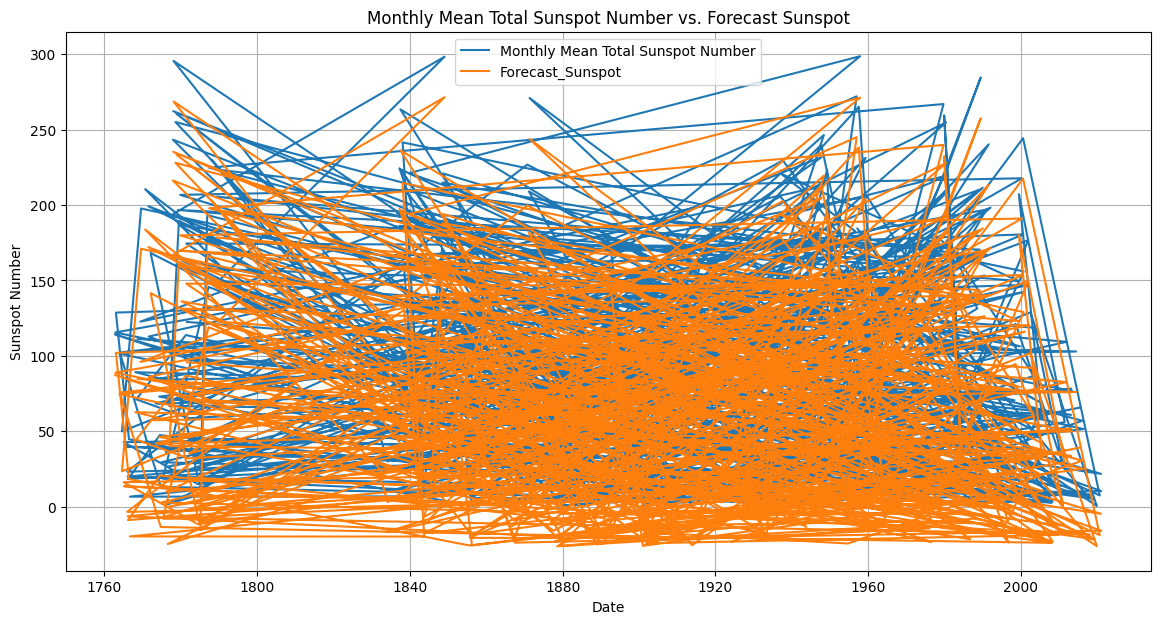

In [ ]:



plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Monthly Mean Total Sunspot Number'], label='Monthly Mean Total Sunspot Number')
plt.plot(df['Date'], df['Forecast_Sunspot'], label='Forecast_Sunspot')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.title('Monthly Mean Total Sunspot Number vs. Forecast Sunspot')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df.index.date, df['Monthly Mean Total Sunspot Number'], label='Monthly Mean Total Sunspot Number')
plt.plot(df.index.date, df['Forecast_Sunspot'], label='Forecast_Sunspot')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.title('Monthly Mean Total Sunspot Number vs. Forecast Sunspot')
plt.legend()
plt.grid(True)
plt.show()


AttributeError: 'RangeIndex' object has no attribute 'date'

<Figure size 1400x700 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


df = pd.read_csv("ForecastSunspot.csv")



df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

#df['RollMean_11year'] = df['Monthly Mean Total Sunspot Number'].rolling(window=132).mean()
#df['RollStd_11year'] = df['Monthly Mean Total Sunspot Number'].rolling(window=132).std()
df['Diff_11Year'] = df['Monthly Mean Total Sunspot Number'].diff(periods=132)


df['Sunspot_lag1'] = df['Monthly Mean Total Sunspot Number'].shift(1)
df['Sunspot_lag2'] = df['Monthly Mean Total Sunspot Number'].shift(2)
df['Sunspot_lag132'] = df['Monthly Mean Total Sunspot Number'].shift(132)


df.dropna(inplace=True)



features = ['Diff_11Year','Month_sin', 'Month_cos','Sunspot_lag132',
            'Sunspot_lag1', 'Sunspot_lag2']
X = df[features]
y = df['Monthly Mean Total Sunspot Number']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



lr = LinearRegression()
lr.fit(X_train, y_train)



y_pred = lr.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)



print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

results_df = X_test.copy()
results_df['Monthly Mean Total Sunspot Number'] = y_test.values
results_df['Forecast_Sunspot'] = y_pred
results_df['Diff'] = y_test.values - y_pred
results_df.reset_index(drop=True, inplace=True)
results_df.to_csv("ForecastSunspotResults1.csv", index=False)

R² Score: -1.4983
MSE: 13395.92
MAE: 89.77


c:\Users\Monster\Desktop\Python\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
